<a href="https://colab.research.google.com/github/seymadogru/BasicDataTypes/blob/master/MyDeepLearningModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import random
import math
import csv
import cv2
import os
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

In [3]:
inputBasePath = "/content/drive/MyDrive/CDD-CESM_last"
outputBasePath = "/content/drive/MyDrive/imagearraynew"

In [4]:
image_width = 224
image_height = 224

In [5]:
classes = ['Benign','Malignant','Normal']

In [6]:
os.chdir(inputBasePath)

In [7]:
X = []
Y = []

In [8]:
i = 0
for class1 in classes:
  os.chdir(class1)
  print('=> '+class1)
  for files in os.listdir('./'):
    img = cv2.imread(files)
    img = cv2.resize(img, (image_width,image_height))
    X.append(img)
    Y.append(class1)
    i = i + 1
  os.chdir('..')

=> Benign
=> Malignant
=> Normal


In [9]:
print("X : ",len(X))
print("Y : ",len(Y))

X :  17006
Y :  17006


In [10]:
X = np.array(X).reshape(-1,image_width,image_height,3)

Y = np.array(Y)

print("X : ",X.shape)
print("Y : ",Y.shape)

print("X : ",len(X))
print("Y : ",len(Y))

X :  (17006, 224, 224, 3)
Y :  (17006,)
X :  17006
Y :  17006


In [11]:
os.chdir('..')

In [12]:
os.chdir("imagearraynew")

In [13]:
np.save(str(image_width)+'x'+str(image_height)+'_images', X)

np.save(str(image_width)+'x'+str(image_height)+'_labels', Y)

print("[ INFO - STAGE1 ]  NUMPY ARRAY CREATION COMPLETED \n ")

[ INFO - STAGE1 ]  NUMPY ARRAY CREATION COMPLETED 
 


In [14]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
utils.to_categorical

<function keras.src.utils.np_utils.to_categorical(y, num_classes=None, dtype='float32')>

In [15]:
data = np.load('/content/drive/MyDrive/imagearraynew/224x224_images.npy')
labels = np.load('/content/drive/MyDrive/imagearraynew/224x224_labels.npy')
data.shape

(17006, 224, 224, 3)

In [16]:
labelEn = LabelEncoder()
labels = labelEn.fit_transform(labels)
labels = to_categorical(labels)

In [17]:
data =  data.reshape(-1,image_width , image_height , 3)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = .05, shuffle = True)

In [19]:
print(
"""
x_train shape: {}
x_test shape: {}
y_train shape: {}
y_test shape: {}

""".format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))


x_train shape: (16155, 224, 224, 3)
x_test shape: (851, 224, 224, 3)
y_train shape: (16155, 3)
y_test shape: (851, 3)




In [20]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = .05, shuffle = True,random_state=42)

In [21]:
print(y_train.shape)
print(y_validate.shape)

(15347, 3)
(808, 3)


In [22]:
!pip install keras
import keras

In [23]:
def model1(input_shape=(image_width ,image_height ,3), num_classes = 3): #parametrelerin varsayılan değerleri var.
    #modelin giriş shape'i ve class sayısı= 3
    #burada oluşturulan model VGG16 mimarisi aslında. değiştirilebilir.
	model = Sequential()
	chanDim = -1

	model.add(Conv2D(64, (3,3), padding="same",input_shape=input_shape))
	model.add(Activation("relu"))
	model.add(BatchNormalization(axis=chanDim))
	model.add(Conv2D(64, (3,3), padding="same"))
	model.add(Activation("relu"))
	model.add(BatchNormalization(axis=chanDim))
	model.add(MaxPooling2D(pool_size=(2, 2)))

	# 2.Layer (CONV => RELU => CONV => RELU) * 2 => POOL
	model.add(Conv2D(128, (3,3), padding="same"))
	model.add(Activation("relu"))
	model.add(BatchNormalization(axis=chanDim))
	model.add(Conv2D(128, (3,3), padding="same"))
	model.add(Activation("relu"))
	model.add(BatchNormalization(axis=chanDim))
	model.add(MaxPooling2D(pool_size=(2, 2)))

	# 3.Layer (CONV => RELU => CONV => RELU) * 2 => POOL
	model.add(Conv2D(256, (3,3), padding="same"))
	model.add(Activation("relu"))
	model.add(BatchNormalization(axis=chanDim))
	model.add(Conv2D(256, (3,3), padding="same"))
	model.add(Activation("relu"))
	model.add(BatchNormalization(axis=chanDim))
	model.add(Conv2D(256, (3,3), padding="same"))
	model.add(Activation("relu"))
	model.add(BatchNormalization(axis=chanDim))
	model.add(MaxPooling2D(pool_size=(2, 2)))

	# 4.Layer (CONV => RELU => CONV => RELU) * 2 => POOL
	model.add(Conv2D(512, (3,3), padding="same"))
	model.add(Activation("relu"))
	model.add(BatchNormalization(axis=chanDim))
	model.add(Conv2D(512, (3,3), padding="same"))
	model.add(Activation("relu"))
	model.add(BatchNormalization(axis=chanDim))
	model.add(Conv2D(512, (3,3), padding="same"))
	model.add(Activation("relu"))
	model.add(BatchNormalization(axis=chanDim))
	model.add(MaxPooling2D(pool_size=(2, 2)))

	# 5.Layer (CONV => RELU => CONV => RELU) * 2 => POOL
	model.add(Conv2D(512, (3,3), padding="same"))
	model.add(Activation("relu"))
	model.add(BatchNormalization(axis=chanDim))
	model.add(Conv2D(512, (3,3), padding="same"))
	model.add(Activation("relu"))
	model.add(BatchNormalization(axis=chanDim))
	model.add(Conv2D(512, (3,3), padding="same"))
	model.add(Activation("relu"))
	model.add(BatchNormalization(axis=chanDim))
	model.add(MaxPooling2D(pool_size=(2, 2)))

	# 1. TAM BAĞLANTI KATMANI
	model.add(Flatten())
	model.add(Dense(4096))
	model.add(Activation("relu"))
	model.add(BatchNormalization())
	model.add(Dropout(0.5))

	# 2. TAM BAĞLANTI KATMANI
	model.add(Flatten())
	model.add(Dense(4096))
	model.add(Activation("relu"))
	model.add(BatchNormalization())
	model.add(Dropout(0.5))

	# SOFTMAX
	model.add(Dense(num_classes))
	model.add(Activation("softmax"))

	return model

In [24]:
model = model1()

In [25]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [26]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1,  factor=0.5, min_lr=0.00001)

In [27]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [28]:
epc = 50
bs = 16

In [29]:
history = model.fit(x_train,y_train, batch_size=bs,
                              epochs = epc, validation_data = (x_validate,y_validate),
                              verbose = 1, callbacks=[learning_rate_reduction])

Epoch 1/50
960/960 [==============================] - 91s 86ms/step - loss: 2.0061 - accuracy: 0.3652 - val_loss: 1.4605 - val_accuracy: 0.3639 - lr: 1.0000e-04
Epoch 2/50
960/960 [==============================] - 79s 83ms/step - loss: 1.5534 - accuracy: 0.3738 - val_loss: 1.4241 - val_accuracy: 0.4134 - lr: 1.0000e-04
Epoch 3/50
960/960 [==============================] - 80s 83ms/step - loss: 1.3773 - accuracy: 0.3984 - val_loss: 1.0967 - val_accuracy: 0.4567 - lr: 1.0000e-04
Epoch 4/50
960/960 [==============================] - 79s 83ms/step - loss: 1.2746 - accuracy: 0.4224 - val_loss: 1.0935 - val_accuracy: 0.4431 - lr: 1.0000e-04
Epoch 5/50
960/960 [==============================] - 79s 83ms/step - loss: 1.2185 - accuracy: 0.4308 - val_loss: 1.2629 - val_accuracy: 0.4493 - lr: 1.0000e-04
Epoch 6/50
960/960 [==============================] - 80s 83ms/step - loss: 1.1675 - accuracy: 0.4460 - val_loss: 1.1152 - val_accuracy: 0.5037 - lr: 1.0000e-04
Epoch 7/50
960/960 [==============

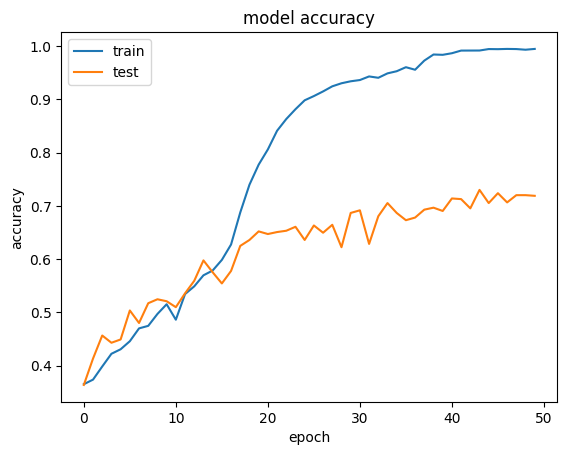

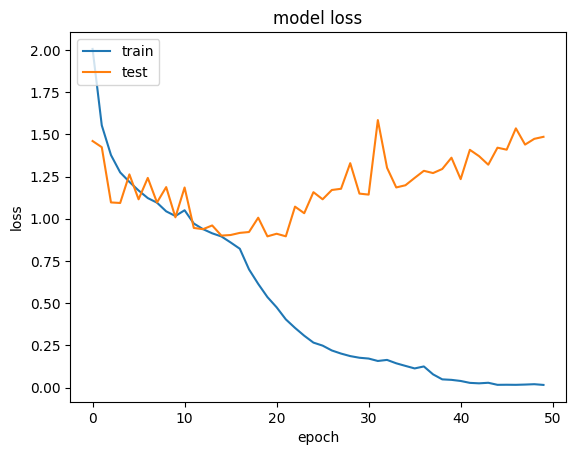

In [31]:

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

27/27 [==============================] - 5s 91ms/step


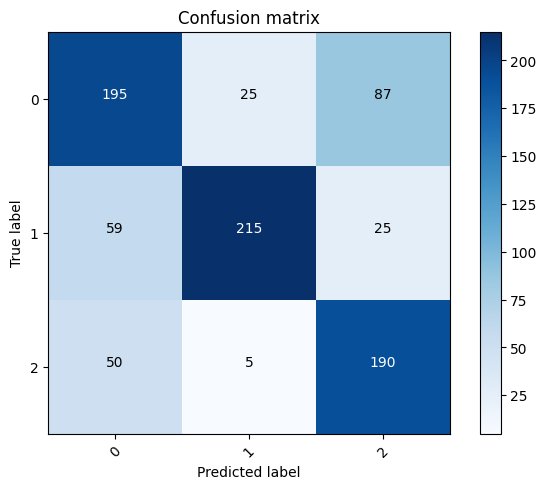

In [32]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)  #test süreci için Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3))

In [33]:
from sklearn.metrics import classification_report
report = classification_report(Y_true, Y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.64      0.64      0.64       307
           1       0.88      0.72      0.79       299
           2       0.63      0.78      0.69       245

    accuracy                           0.71       851
   macro avg       0.72      0.71      0.71       851
weighted avg       0.72      0.71      0.71       851

